Amazon Book Reviews - Database with 3 mln+ books and reviews. Our main components are:
1) Explanatory Data Analysis
2) Complex Sentiment Analysis
3) Training Recommendation System

In [1]:
import numpy as np

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from wordcloud import WordCloud

In [4]:
br = pd.read_csv(r"./Books_rating.csv")
bd = pd.read_csv(r"./books_data.csv")

In [5]:
br.head(5)

,Id,Title,Price,User_id,profileName,review/helpfulness,review/score,review/time,review/summary,review/text
0,1882931173,Its Only Art If Its Well Hung!,NaN,AVCGYZL8FQQTD,"Jim of Oz ""jim-of-oz""",7/7,4.0,940636800,Nice collection of Julie Strain images,This is only for Julie Strain fans. It's a col...
1,0826414346,Dr. Seuss: American Icon,NaN,A30TK6U7DNS82R,Kevin Killian,10/10,5.0,1095724800,Really Enjoyed It,I don't care much for Dr. Seuss but after read...
2,0826414346,Dr. Seuss: American Icon,NaN,A3UH4UZ4RSVO82,John Granger,10/11,5.0,1078790400,Essential for every personal and Public Library,"If people become the books they read and if ""t..."
3,0826414346,Dr. Seuss: American Icon,NaN,A2MVUWT453QH61,"Roy E. Perry ""amateur philosopher""",7/7,4.0,1090713600,Phlip Nel gives silly Seuss a serious treatment,"Theodore Seuss Geisel (1904-1991), aka &quot;D..."
4,0826414346,Dr. Seuss: American Icon,NaN,A22X4XUPKF66MR,"D. H. Richards ""ninthwavestore""",3/3,4.0,1107993600,Good academic overview,Philip Nel - Dr. Seuss: American IconThis is b...


In [6]:
bd.head(5)

,Title,description,authors,image,previewLink,publisher,publishedDate,infoLink,categories,ratingsCount
0,Its Only Art If Its Well Hung!,NaN,['Julie Strain'],http://books.google.com/books/content?id=DykPA...,http://books.google.nl/books?id=DykPAAAACAAJ&d...,NaN,1996,http://books.google.nl/books?id=DykPAAAACAAJ&d...,['Comics & Graphic Novels'],NaN
1,Dr. Seuss: American Icon,Philip Nel takes a fascinating look into the k...,['Philip Nel'],http://books.google.com/books/content?id=IjvHQ...,http://books.google.nl/books?id=IjvHQsCn_pgC&p...,A&C Black,2005-01-01,http://books.google.nl/books?id=IjvHQsCn_pgC&d...,['Biography & Autobiography'],NaN
2,Wonderful Worship in Smaller Churches,This resource includes twelve principles in un...,['David R. Ray'],http://books.google.com/books/content?id=2tsDA...,http://books.google.nl/books?id=2tsDAAAACAAJ&d...,NaN,2000,http://books.google.nl/books?id=2tsDAAAACAAJ&d...,['Religion'],NaN
3,Whispers of the Wicked Saints,Julia Thomas finds her life spinning out of co...,['Veronica Haddon'],http://books.google.com/books/content?id=aRSIg...,http://books.google.nl/books?id=aRSIgJlq6JwC&d...,iUniverse,2005-02,http://books.google.nl/books?id=aRSIgJlq6JwC&d...,['Fiction'],NaN
4,"Nation Dance: Religion, Identity and Cultural ...",NaN,['Edward Long'],NaN,http://books.google.nl/books?id=399SPgAACAAJ&d...,NaN,2003-03-01,http://books.google.nl/books?id=399SPgAACAAJ&d...,NaN,NaN


In [7]:
br.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000000 entries, 0 to 2999999
Data columns (total 10 columns):
 #   Column              Dtype  
---  ------              -----  
 0   Id                  object 
 1   Title               object 
 2   Price               float64
 3   User_id             object 
 4   profileName         object 
 5   review/helpfulness  object 
 6   review/score        float64
 7   review/time         int64  
 8   review/summary      object 
 9   review/text         object 
dtypes: float64(2), int64(1), object(7)
memory usage: 228.9+ MB


In [8]:
books = pd.merge(br,bd, on = 'Title')
books.shape

(3000000, 19)

In [9]:
books.head(5)

,Id,Title,Price,User_id,profileName,review/helpfulness,review/score,review/time,review/summary,review/text,description,authors,image,previewLink,publisher,publishedDate,infoLink,categories,ratingsCount
0,1882931173,Its Only Art If Its Well Hung!,NaN,AVCGYZL8FQQTD,"Jim of Oz ""jim-of-oz""",7/7,4.0,940636800,Nice collection of Julie Strain images,This is only for Julie Strain fans. It's a col...,NaN,['Julie Strain'],http://books.google.com/books/content?id=DykPA...,http://books.google.nl/books?id=DykPAAAACAAJ&d...,NaN,1996,http://books.google.nl/books?id=DykPAAAACAAJ&d...,['Comics & Graphic Novels'],NaN
1,0826414346,Dr. Seuss: American Icon,NaN,A30TK6U7DNS82R,Kevin Killian,10/10,5.0,1095724800,Really Enjoyed It,I don't care much for Dr. Seuss but after read...,Philip Nel takes a fascinating look into the k...,['Philip Nel'],http://books.google.com/books/content?id=IjvHQ...,http://books.google.nl/books?id=IjvHQsCn_pgC&p...,A&C Black,2005-01-01,http://books.google.nl/books?id=IjvHQsCn_pgC&d...,['Biography & Autobiography'],NaN
2,0826414346,Dr. Seuss: American Icon,NaN,A3UH4UZ4RSVO82,John Granger,10/11,5.0,1078790400,Essential for every personal and Public Library,"If people become the books they read and if ""t...",Philip Nel takes a fascinating look into the k...,['Philip Nel'],http://books.google.com/books/content?id=IjvHQ...,http://books.google.nl/books?id=IjvHQsCn_pgC&p...,A&C Black,2005-01-01,http://books.google.nl/books?id=IjvHQsCn_pgC&d...,['Biography & Autobiography'],NaN
3,0826414346,Dr. Seuss: American Icon,NaN,A2MVUWT453QH61,"Roy E. Perry ""amateur philosopher""",7/7,4.0,1090713600,Phlip Nel gives silly Seuss a serious treatment,"Theodore Seuss Geisel (1904-1991), aka &quot;D...",Philip Nel takes a fascinating look into the k...,['Philip Nel'],http://books.google.com/books/content?id=IjvHQ...,http://books.google.nl/books?id=IjvHQsCn_pgC&p...,A&C Black,2005-01-01,http://books.google.nl/books?id=IjvHQsCn_pgC&d...,['Biography & Autobiography'],NaN
4,0826414346,Dr. Seuss: American Icon,NaN,A22X4XUPKF66MR,"D. H. Richards ""ninthwavestore""",3/3,4.0,1107993600,Good academic overview,Philip Nel - Dr. Seuss: American IconThis is b...,Philip Nel takes a fascinating look into the k...,['Philip Nel'],http://books.google.com/books/content?id=IjvHQ...,http://books.google.nl/books?id=IjvHQsCn_pgC&p...,A&C Black,2005-01-01,http://books.google.nl/books?id=IjvHQsCn_pgC&d...,['Biography & Autobiography'],NaN


In [10]:
df = books[['Title','review/score','review/text','authors','categories','ratingsCount']]
df.head(5)

,Title,review/score,review/text,authors,categories,ratingsCount
0,Its Only Art If Its Well Hung!,4.0,This is only for Julie Strain fans. It's a col...,['Julie Strain'],['Comics & Graphic Novels'],NaN
1,Dr. Seuss: American Icon,5.0,I don't care much for Dr. Seuss but after read...,['Philip Nel'],['Biography & Autobiography'],NaN
2,Dr. Seuss: American Icon,5.0,"If people become the books they read and if ""t...",['Philip Nel'],['Biography & Autobiography'],NaN
3,Dr. Seuss: American Icon,4.0,"Theodore Seuss Geisel (1904-1991), aka &quot;D...",['Philip Nel'],['Biography & Autobiography'],NaN
4,Dr. Seuss: American Icon,4.0,Philip Nel - Dr. Seuss: American IconThis is b...,['Philip Nel'],['Biography & Autobiography'],NaN


In [11]:
df.drop_duplicates(inplace = True)
df.shape

C:\Users\User\AppData\Local\Temp\ipykernel_18440\2543301332.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop_duplicates(inplace = True)


(2617289, 6)

In [12]:
df.isna().sum()

Title               207
review/score          0
review/text           8
authors          350198
categories       465848
ratingsCount    1234897
dtype: int64

Maybe we should count ratingCount? Not just drop it:

ratingsCount	averaging rating for book

In [13]:
df.dropna(inplace = True)
df.isna().sum()

C:\Users\User\AppData\Local\Temp\ipykernel_18440\1447479521.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(inplace = True)


Title           0
review/score    0
review/text     0
authors         0
categories      0
ratingsCount    0
dtype: int64

In [14]:
df.shape

(1325891, 6)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1325891 entries, 47 to 2999999
Data columns (total 6 columns):
 #   Column        Non-Null Count    Dtype  
---  ------        --------------    -----  
 0   Title         1325891 non-null  object 
 1   review/score  1325891 non-null  float64
 2   review/text   1325891 non-null  object 
 3   authors       1325891 non-null  object 
 4   categories    1325891 non-null  object 
 5   ratingsCount  1325891 non-null  float64
dtypes: float64(2), object(4)
memory usage: 70.8+ MB


Just for training I will use 15 000 books:

In [16]:
data = df.sample(15000)
data.shape

(15000, 6)

In [17]:
data['authors'] = data['authors'].str.extract(r'\'(.*)\'')
data['categories'] = data['categories'].str.extract(r'\'(.*)\'')

In [18]:
data['word_count'] = data['review/text'].apply(lambda x: len(x.split(' ')))

In [19]:
data.head()

,Title,review/score,review/text,authors,categories,ratingsCount,word_count
2119233,"Hard Contact (Star Wars: Republic Commando, Bo...",5.0,Let's be honest-most of these Star Wars novels...,Karen Traviss,Fiction,11.0,209
2280887,Odd Thomas,3.0,"First, I'm a huge fan and have read more books...",Dean Koontz,Fiction,168.0,123
2310129,The Hunt for RED OCTOBER,2.0,Red October is choked with too much detail in ...,Tom Clancy,Fiction,36.0,959
527744,Clan of the Cave Bear (Earth's Children),4.0,This book was recommended to me by a former st...,Jean M. Auel,Fiction,4.0,133
387581,"One Shot (Jack Reacher, No. 9)",5.0,I have been reading my way through the Reacher...,Lee Child,Fiction,8.0,80


EDA:

Books with the highest rating:

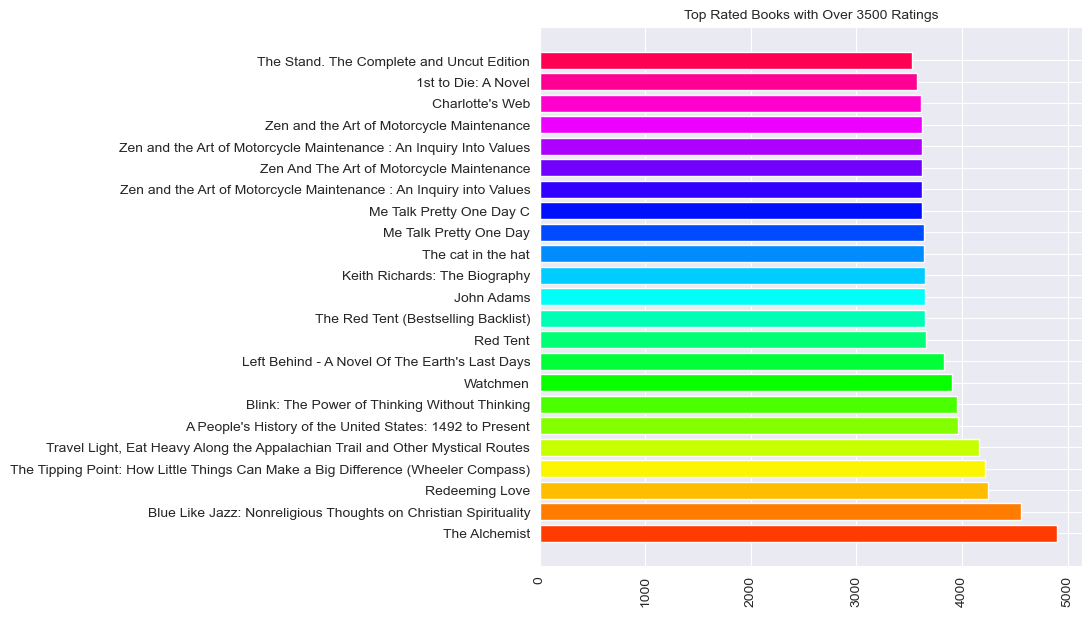

In [24]:
fig, ax = plt.subplots(figsize=(7, 7))
filtered_books = data.query('ratingsCount > 3500').drop_duplicates(subset=['Title', 'ratingsCount']).sort_values('ratingsCount', ascending=False)
palette_colors = sns.color_palette("hsv", len(filtered_books))
ax.barh(filtered_books['Title'], filtered_books['ratingsCount'], color=palette_colors)
ax.set_title('Top Rated Books with Over 3500 Ratings', fontsize=10)
plt.xticks(rotation=90)
plt.show()

Books Highlighted by Their Word Count Analysis:

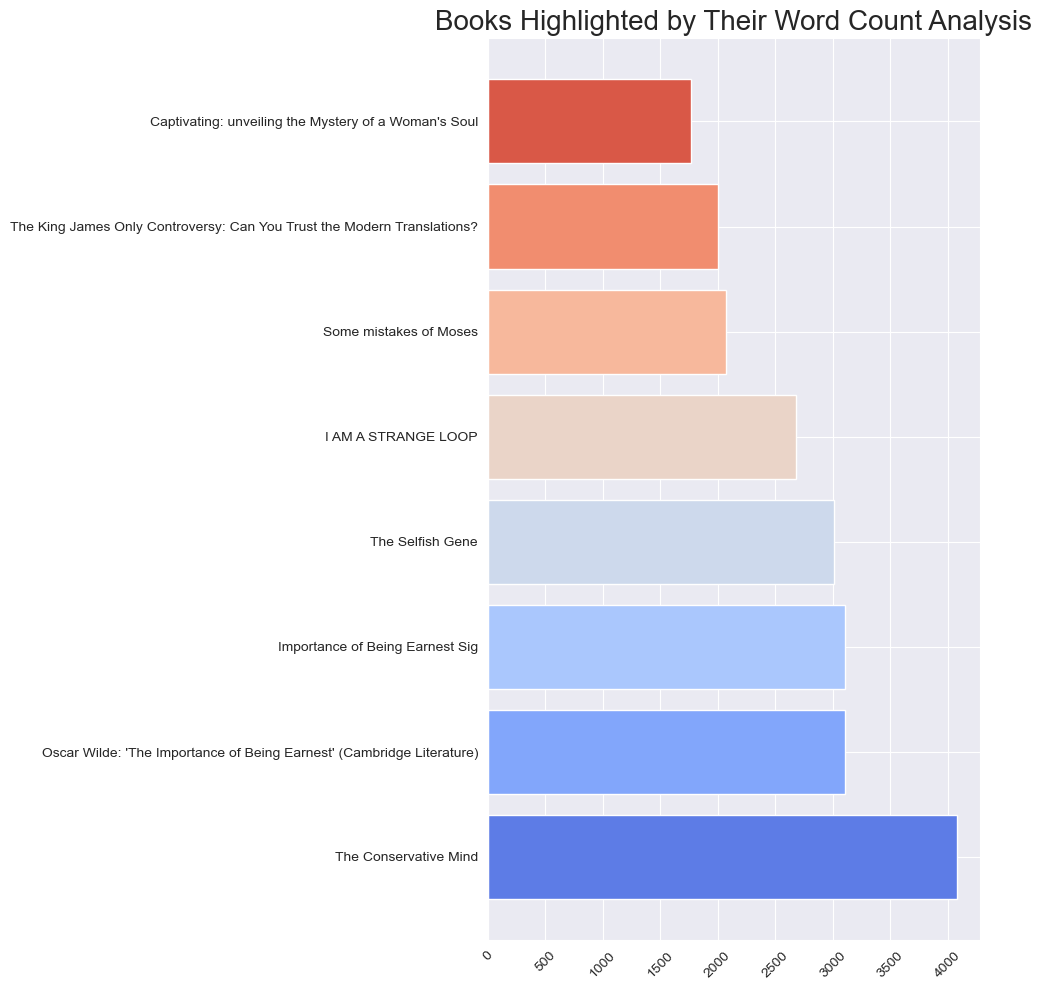

In [25]:
fig, axis = plt.subplots(figsize=(10, 10))
selected_books = data.loc[data['word_count'] > 1707, ['Title', 'word_count']].sort_values('word_count', ascending=False)
palette = sns.color_palette("coolwarm", len(selected_books))
axis.barh(selected_books['Title'], selected_books['word_count'], color=palette)
axis.set_title('Books Highlighted by Their Word Count Analysis', fontsize=20)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Distribution of books based on Genre:

In [ ]:
labels = data['categories'].value_counts().head(7).keys().tolist()
fig, ax = plt.subplots(figsize=(10, 10))
category_counts = data['categories'].value_counts().nlargest(7)
ax.pie(category_counts, labels=labels, autopct='%1.1f%%')
ax.set_title('Genre Distribution Overview', fontsize=10)
ax.legend()
plt.show()

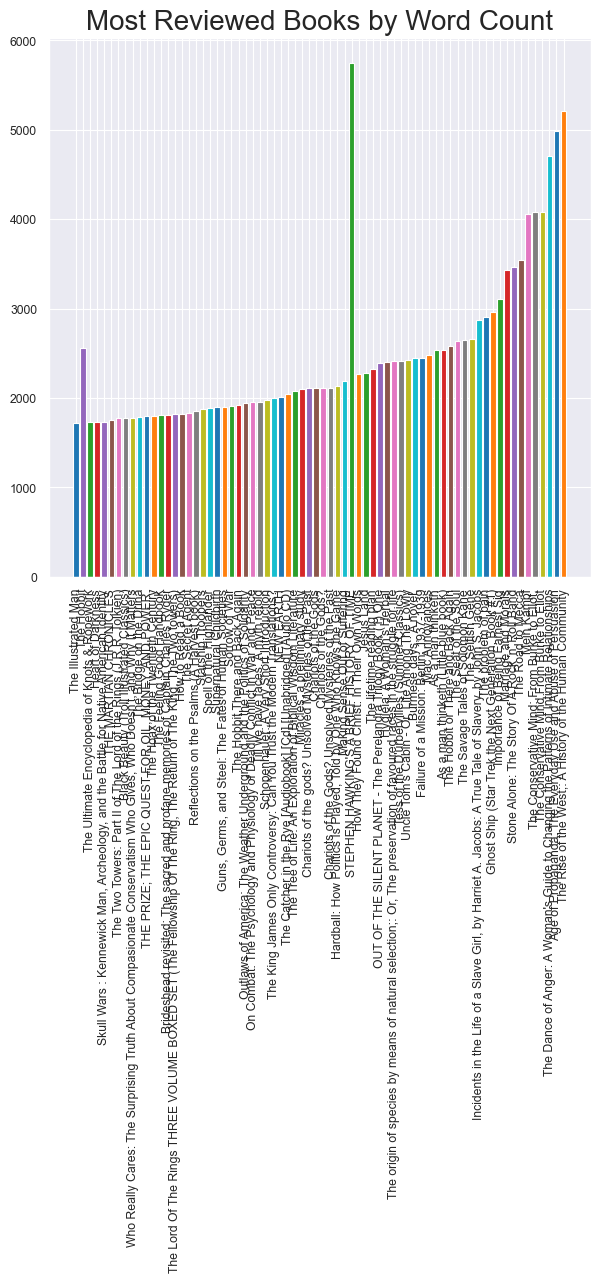

In [68]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 10))
cou = data[data['word_count'] > 1707][['Title', 'word_count']].sort_values(by='word_count', ascending=True)
colors = sns.color_palette(n_colors=len(cou))
bars = plt.bar(cou['Title'], cou['word_count'], color=colors)
plt.title('Most Reviewed Books by Word Count', fontsize=20)
plt.xticks(rotation=90)
plt.show()

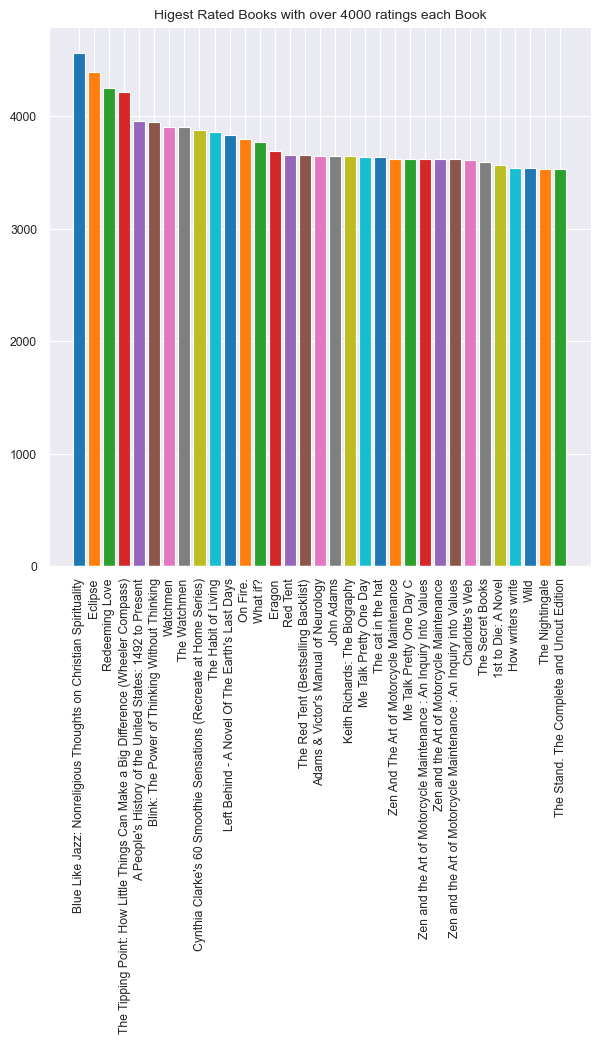

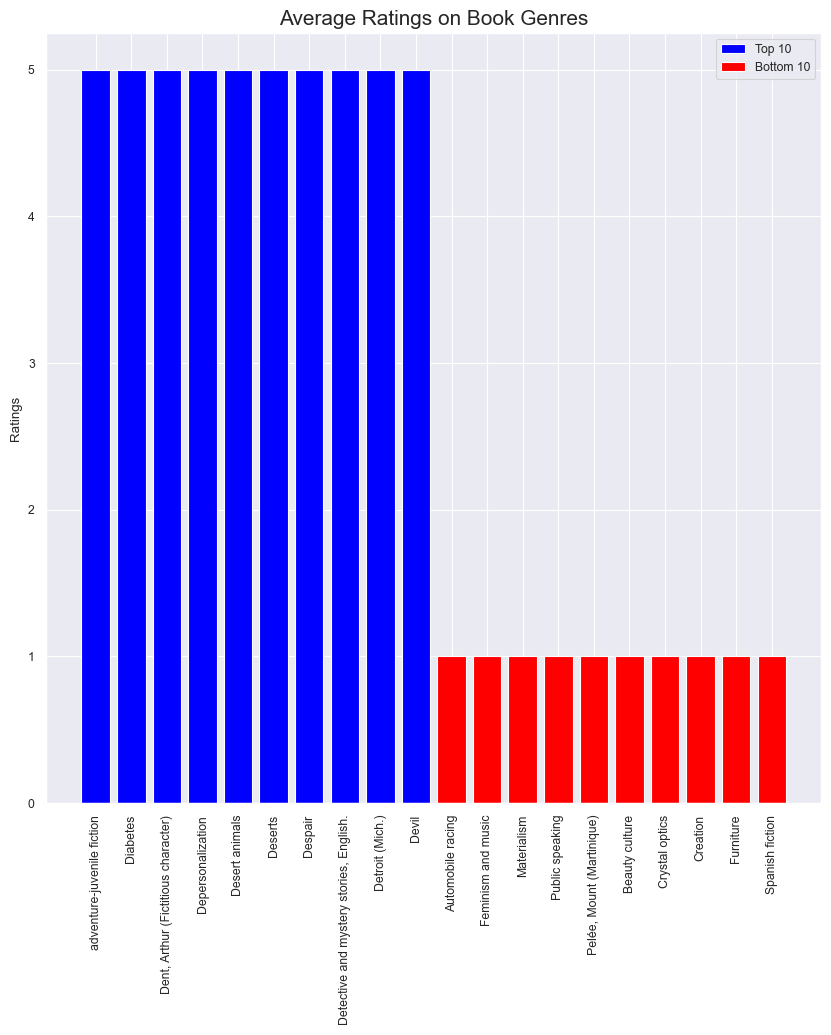

In [70]:
# Convert 'review/score' column to numeric (if applicable)
data['review/score'] = pd.to_numeric(data['review/score'], errors='coerce')

# Filter out non-numeric values (if any)
numeric_data = data.dropna(subset=['review/score'])

# Group by 'categories' and compute the mean of 'review/score'
avg_cat_rating = numeric_data.groupby('categories')['review/score'].mean().sort_values(ascending=False).head(10)
avg_cat_rating_d = numeric_data.groupby('categories')['review/score'].mean().sort_values().head(10)

# Plot the bar chart for top and bottom categories
plt.figure(figsize=(10, 10))
plt.bar(avg_cat_rating.index, avg_cat_rating, color='blue', label='Top 10')
plt.bar(avg_cat_rating_d.index, avg_cat_rating_d, color='red', label='Bottom 10')
plt.title('Average Ratings on Book Genres', fontsize=15)
plt.xticks(rotation='vertical')
plt.ylabel('Ratings')
plt.legend()
plt.show()

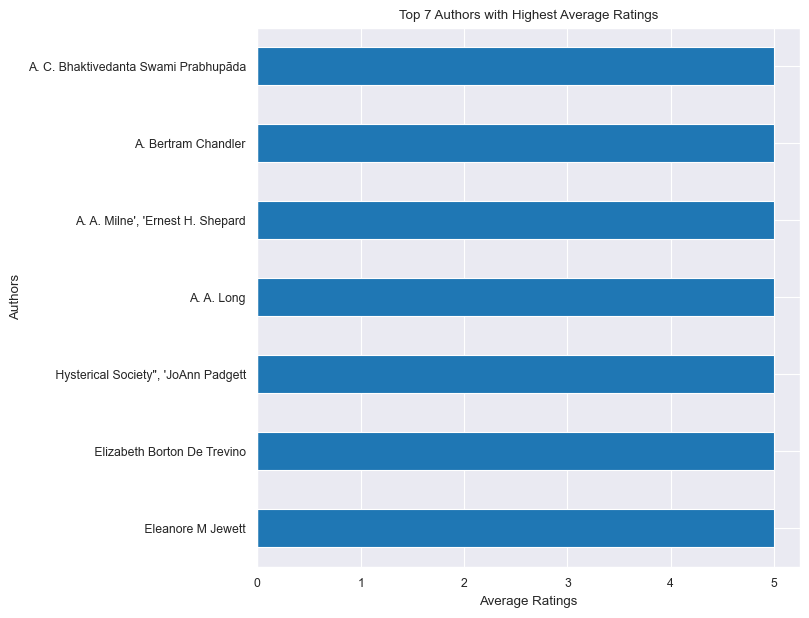

In [71]:
# Convert 'review/score' column to numeric, coercing errors to NaN
data['review/score'] = pd.to_numeric(data['review/score'], errors='coerce')

# Group by 'authors', compute the mean of 'review/score', and plot the top 10 authors
top_authors = data.groupby('authors')['review/score'].mean().nlargest(7)
top_authors.plot(kind='barh', figsize=(7, 7))
plt.title('Top 7 Authors with Highest Average Ratings')
plt.xlabel('Average Ratings')
plt.ylabel('Authors')
plt.show()

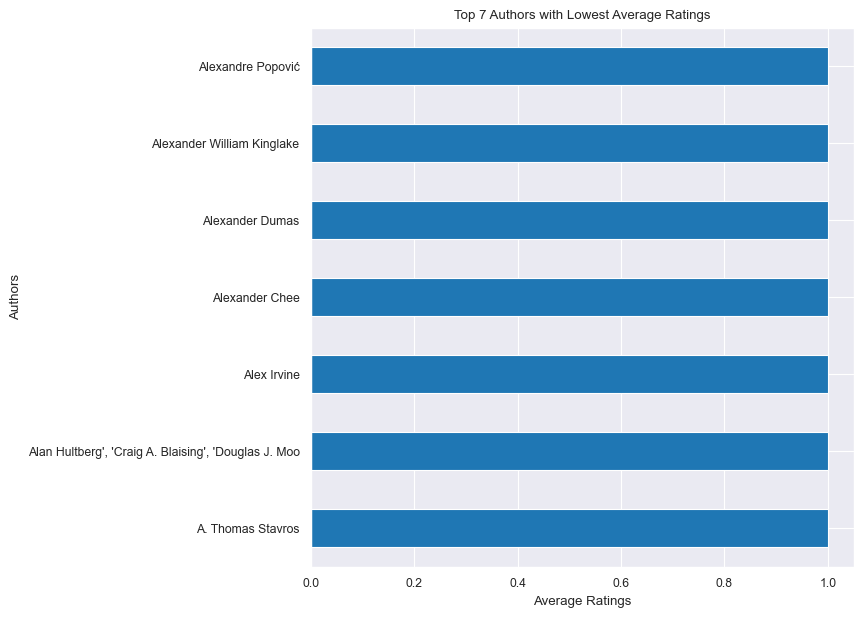

In [72]:
# Group by 'authors', compute the mean of 'review/score', and plot the top 10 authors
bottom_authors = data.groupby('authors')['review/score'].mean().nsmallest(7)
bottom_authors.plot(kind='barh', figsize=(7, 7))
plt.title('Top 7 Authors with Lowest Average Ratings')
plt.xlabel('Average Ratings')
plt.ylabel('Authors')
plt.show()

Sentiment Analysis

In [73]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
vader = SentimentIntensityAnalyzer()

In [74]:
data.head(2)

,Title,review/score,review/text,authors,categories,ratingsCount,word_count
2534153,"Brave new world,: A novel",3.0,Two of my favorite books are 1984 and Animal F...,Aldous Huxley,Fiction,2711.0,374
1618249,"Nicolae: Left Behind, Volume 3",5.0,I read the first two as fast as I've ever read...,"Tim LaHaye', 'Jerry B. Jenkins",Fiction,36.0,54


In [75]:
# We must lower case all reviews and calculate polarity_score
data['clean_reviews'] = data['review/text'].str.lower()
data['polarity'] = data['clean_reviews'].apply(lambda review: vader.polarity_scores(review))
data['compound']  = data['polarity'].apply(lambda score_dict: score_dict['compound'])

In [76]:
data.head(3)

,Title,review/score,review/text,authors,categories,ratingsCount,word_count,clean_reviews,polarity,compound
2534153,"Brave new world,: A novel",3.0,Two of my favorite books are 1984 and Animal F...,Aldous Huxley,Fiction,2711.0,374,two of my favorite books are 1984 and animal f...,"{'neg': 0.122, 'neu': 0.753, 'pos': 0.125, 'co...",-0.7855
1618249,"Nicolae: Left Behind, Volume 3",5.0,I read the first two as fast as I've ever read...,"Tim LaHaye', 'Jerry B. Jenkins",Fiction,36.0,54,i read the first two as fast as i've ever read...,"{'neg': 0.043, 'neu': 0.773, 'pos': 0.184, 'co...",0.8774
2460318,"God Bless You, Mr. Rosewater : Or Pearls Befor...",4.0,Although it's probably destined to wallow in t...,Kurt Vonnegut,Absurd (Philosophy),43.0,307,although it's probably destined to wallow in t...,"{'neg': 0.081, 'neu': 0.76, 'pos': 0.158, 'com...",0.9719


In [77]:

def calculate_sentiment(score):
    if score >= 0.05:
        return 'positive'
    elif score <= -0.05:
        return 'negative'
    else:
        return 'neutral'


In [78]:
data['sentiment'] = data['compound'].apply(lambda x: calculate_sentiment(x))

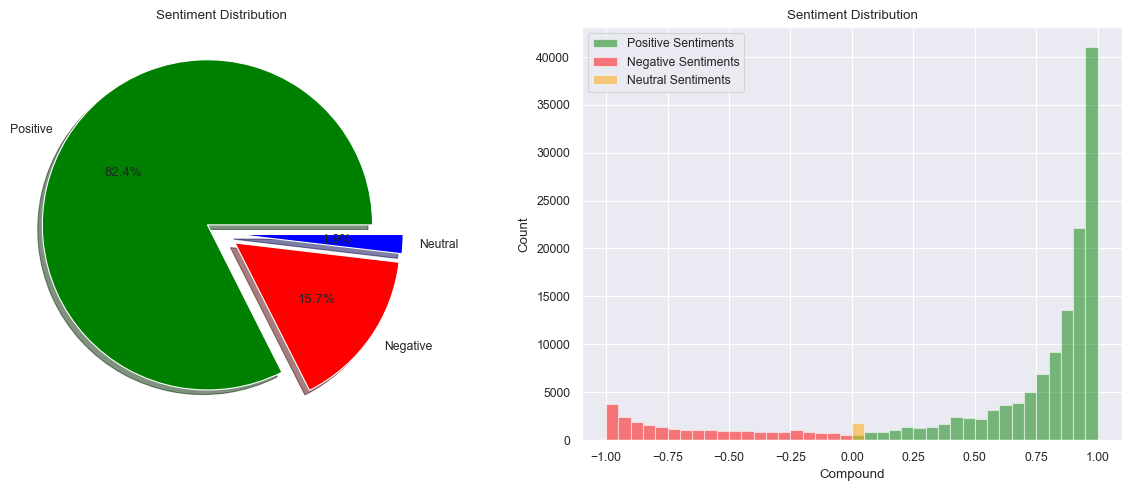

In [79]:
import matplotlib.pyplot as plt

# Create a figure and subplots with 1 row and 2 columns
plt.figure(figsize=(12, 5))

# Plot 1 - Pie chart for sentiment distribution
plt.subplot(1, 2, 1)
labels = ['Positive', 'Negative', 'Neutral']
sizes = data['sentiment'].value_counts()
colors = ['green', 'red', 'blue']
explode = (0.1, 0.1, 0.1)

plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True)
plt.title('Sentiment Distribution')

# Plot 2 - Histogram for sentiment distribution
plt.subplot(1, 2, 2)
positive = data[data['compound'] > 0]['compound']
negative = data[data['compound'] < 0]['compound']
neutral = data[data['compound'] == 0]['compound']

sentiments = [positive, negative, neutral]
colors = ['green', 'red', 'orange']
labels = ['Positive Sentiments', 'Negative Sentiments', 'Neutral Sentiments']

for sentiment, color, label in zip(sentiments, colors, labels):
    plt.hist(sentiment, bins=20, color=color, alpha=0.5, label=label)

plt.title('Sentiment Distribution')
plt.xlabel('Compound')
plt.ylabel('Count')
plt.legend()

plt.tight_layout()
plt.show()

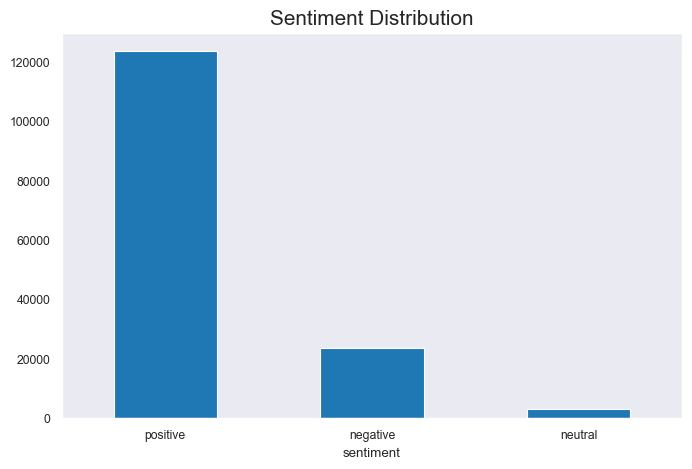

In [80]:
data['sentiment'].value_counts().plot(kind = 'bar', figsize = (8,5))
plt.xticks(rotation = 'horizontal')
plt.title('Sentiment Distribution',fontsize = 15)
plt.grid()
plt.show()

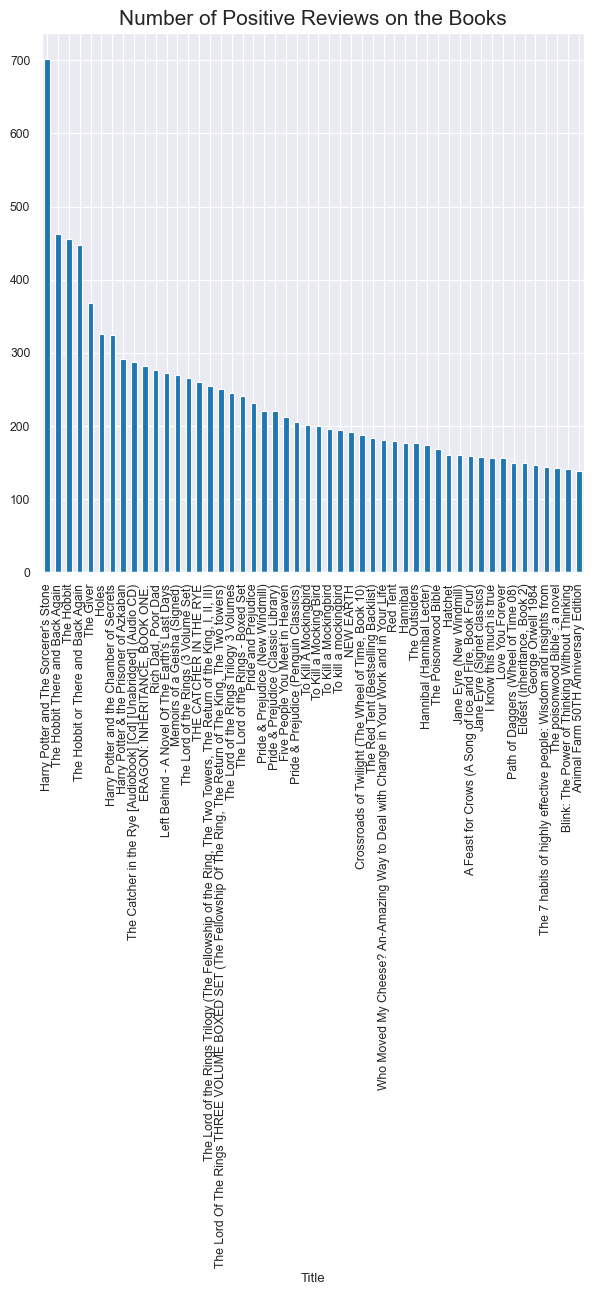

In [81]:
data[data['sentiment'] == 'positive']['Title'].value_counts().head(50).plot(kind = 'bar', figsize = (7,7))
plt.title('Number of Positive Reviews on the Books',fontsize = 15)
plt.xticks(rotation = 90)
plt.show()

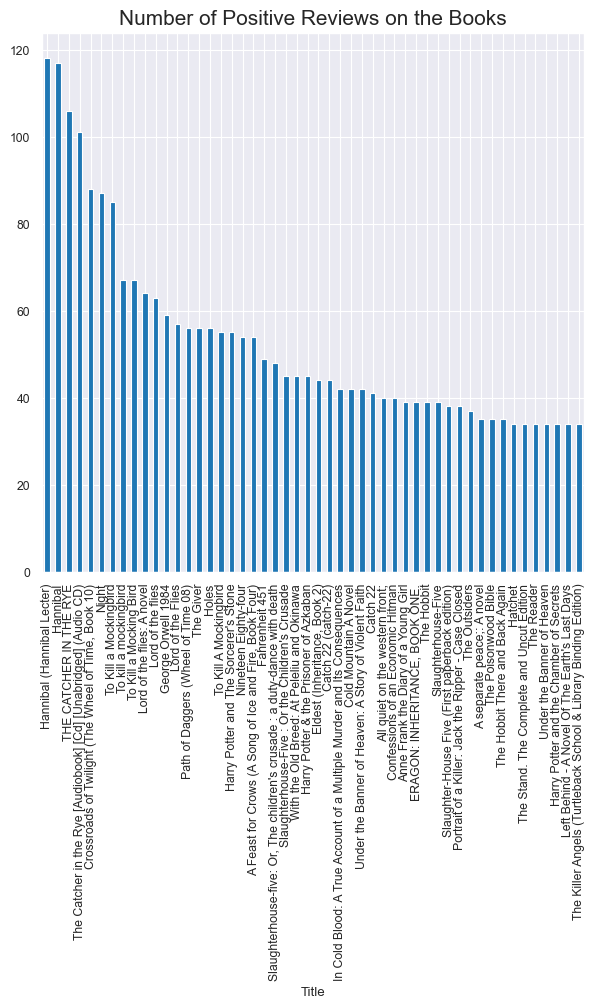

In [82]:
data[data['sentiment'] == 'negative']['Title'].value_counts().head(50).plot(kind = 'bar', figsize = (7,7))
plt.title('Number of Positive Reviews on the Books',fontsize = 15)
plt.xticks(rotation = 90)
plt.show()

In [83]:
data.head()

,Title,review/score,review/text,authors,categories,ratingsCount,word_count,clean_reviews,polarity,compound,sentiment
2534153,"Brave new world,: A novel",3.0,Two of my favorite books are 1984 and Animal F...,Aldous Huxley,Fiction,2711.0,374,two of my favorite books are 1984 and animal f...,"{'neg': 0.122, 'neu': 0.753, 'pos': 0.125, 'co...",-0.7855,negative
1618249,"Nicolae: Left Behind, Volume 3",5.0,I read the first two as fast as I've ever read...,"Tim LaHaye', 'Jerry B. Jenkins",Fiction,36.0,54,i read the first two as fast as i've ever read...,"{'neg': 0.043, 'neu': 0.773, 'pos': 0.184, 'co...",0.8774,positive
2460318,"God Bless You, Mr. Rosewater : Or Pearls Befor...",4.0,Although it's probably destined to wallow in t...,Kurt Vonnegut,Absurd (Philosophy),43.0,307,although it's probably destined to wallow in t...,"{'neg': 0.081, 'neu': 0.76, 'pos': 0.158, 'com...",0.9719,positive
377351,Blood of the Fold (Sword of Truth Series),4.0,I am enjoying listening to all of the Sword Of...,Terry Goodkind,Good and evil,1.0,33,i am enjoying listening to all of the sword of...,"{'neg': 0.0, 'neu': 0.686, 'pos': 0.314, 'comp...",0.8957,positive
617327,Plainsong,2.0,I kept hanging on to the chapters of this book...,Kent Haruf,Fiction,117.0,59,i kept hanging on to the chapters of this book...,"{'neg': 0.042, 'neu': 0.914, 'pos': 0.045, 'co...",0.0534,positive


In [84]:
agg_df = data.groupby('Title').agg({'review/score': ['count', 'mean']}).reset_index()
agg_df.columns = ['Title', 'Number of Reviews', 'Average Score']

In [85]:
agg_df.sort_values('Number of Reviews', ascending=False)

,Title,Number of Reviews,Average Score
8219,Harry Potter and The Sorcerer's Stone,770,4.771429
20138,The Hobbit There and Back Again,506,4.642292
20137,The Hobbit,505,4.592079
20139,The Hobbit or There and Back Again,484,4.702479
19812,The Giver,431,4.238979
...,...,...,...
13164,Nothing More Than Murder,1,3.000000
13170,Nothing to Declare: Memoirs of a Woman Traveli...,1,5.000000
13174,Novel Ideas-Science Fiction,1,4.000000
13186,Nowhere Man,1,3.000000


In [86]:
trial = agg_df[['Average Score', 'Number of Reviews']]
trial_data = np.asarray([np.asarray(trial['Average Score']), np.asarray(trial['Number of Reviews'])]).T

In [102]:
from sklearn.cluster import KMeans
from scipy.cluster.vq import kmeans, vq


def train_clusters(df):
    X = df
    distortions = []
    for k in range(2,20):
        k_means = KMeans(n_clusters = k)
        k_means.fit(X)
        distortions.append(k_means.inertia_)
    
    fig = plt.figure(figsize=(15,10))
    plt.plot(range(2,20), distortions, 'bx-')
    plt.title("Elbow Curve")

    
    #Computing K means with K = 5, thus, taking it as 5 clusters
    centroids, _ = kmeans(df, 5)
    
    #assigning each sample to a cluster
    #Vector Quantisation:
    
    idx, _ = vq(df, centroids)
    return idx, centroids

C:\ProgramData\anaconda3\envs\SeniorProjectModel\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\anaconda3\envs\SeniorProjectModel\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\anaconda3\envs\SeniorProjectModel\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\anaconda3\envs\SeniorProjectModel\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly t

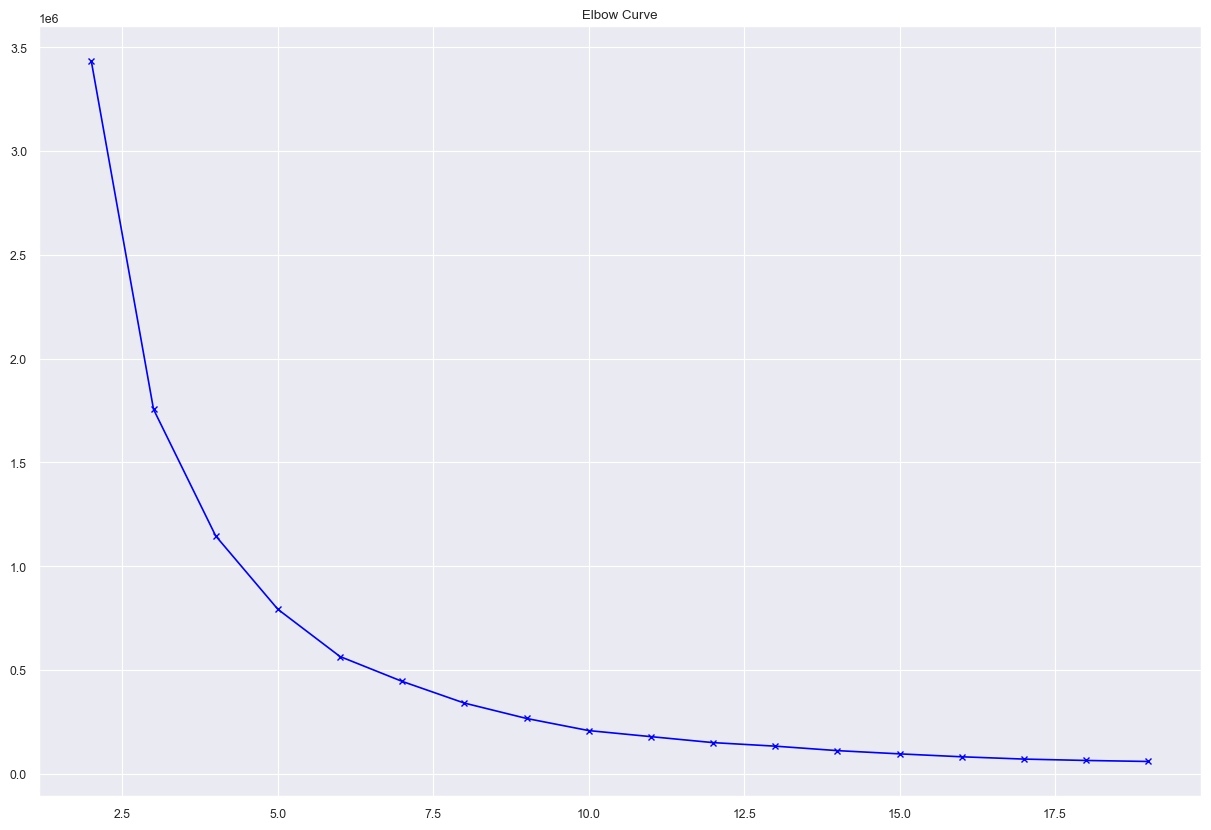

In [103]:
index, centroid = train_clusters(trial_data)

In [104]:
from matplotlib.lines import Line2D

def plot_clusters(df, idx, centroids):
    sns.set_context('paper')
    plt.figure(figsize=(15,10))
    plt.plot(df[idx==0,0],df[idx==0,1],'or',#red circles
             df[idx==1,0],df[idx==1,1],'ob',#blue circles
             df[idx==2,0],df[idx==2,1],'oy', #yellow circles
             df[idx==3,0],df[idx==3,1],'om', #magenta circles
             df[idx==4,0],df[idx==4,1],'ok',#black circles
    
    
    
    
    
    
             )
    plt.plot(centroids[:,0],centroids[:,1],'sg',markersize=8, )
    
    
    
    
    circle1 = Line2D(range(1), range(1), color = 'red', linewidth = 0, marker= 'o', markerfacecolor='red')
    circle2 = Line2D(range(1), range(1), color = 'blue', linewidth = 0,marker= 'o', markerfacecolor='blue')
    circle3 = Line2D(range(1), range(1), color = 'yellow',linewidth=0,  marker= 'o', markerfacecolor='yellow')
    circle4 = Line2D(range(1), range(1), color = 'magenta', linewidth=0,marker= 'o', markerfacecolor='magenta')
    circle5 = Line2D(range(1), range(1), color = 'black', linewidth = 0,marker= 'o', markerfacecolor='black')
    
    plt.legend((circle1, circle2, circle3, circle4, circle5)
               , ('Cluster 1','Cluster 2', 'Cluster 3', 'Cluster 4', 'Cluster 5'), numpoints = 1, loc = 0, )
    
    
    plt.show()

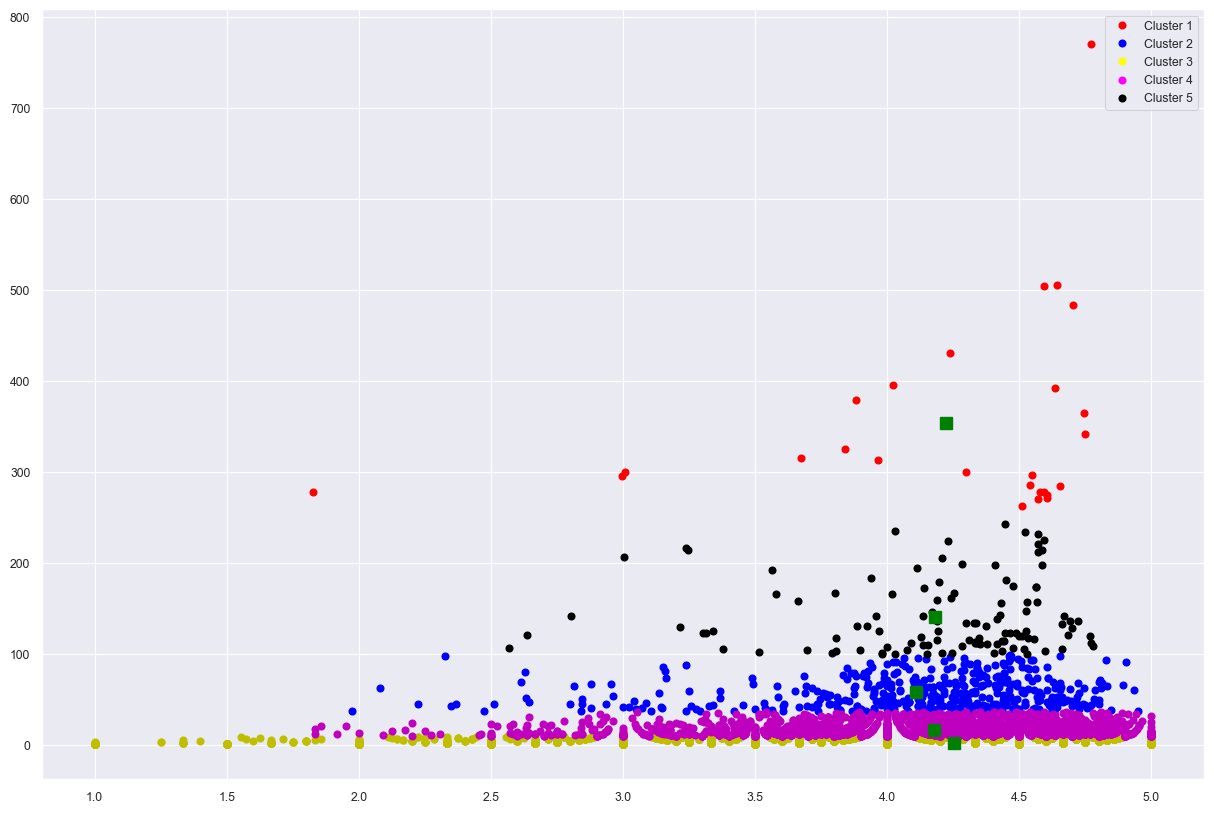

In [105]:
plot_clusters(trial_data, index, centroid)

In [106]:
trial.idxmax()


Average Score           3
Number of Reviews    8219
dtype: int64

C:\ProgramData\anaconda3\envs\SeniorProjectModel\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\anaconda3\envs\SeniorProjectModel\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\anaconda3\envs\SeniorProjectModel\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\anaconda3\envs\SeniorProjectModel\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly t

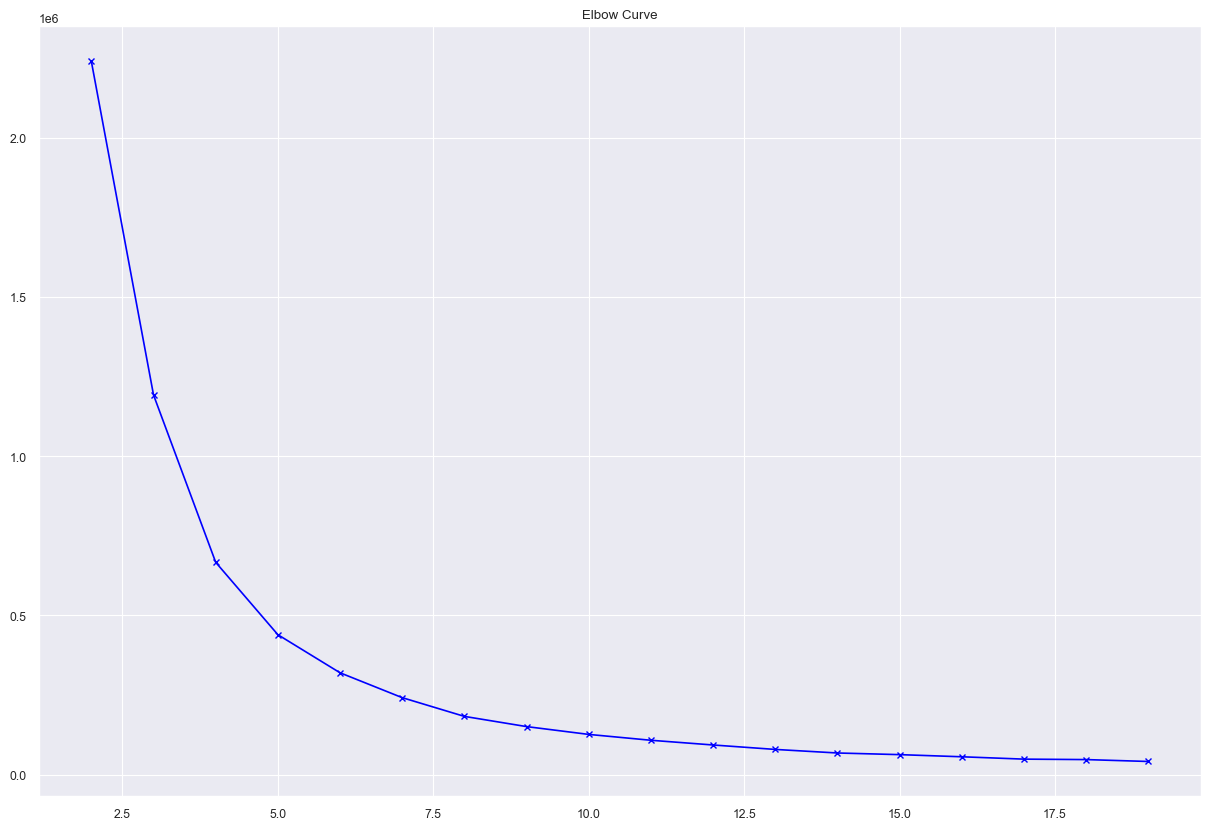

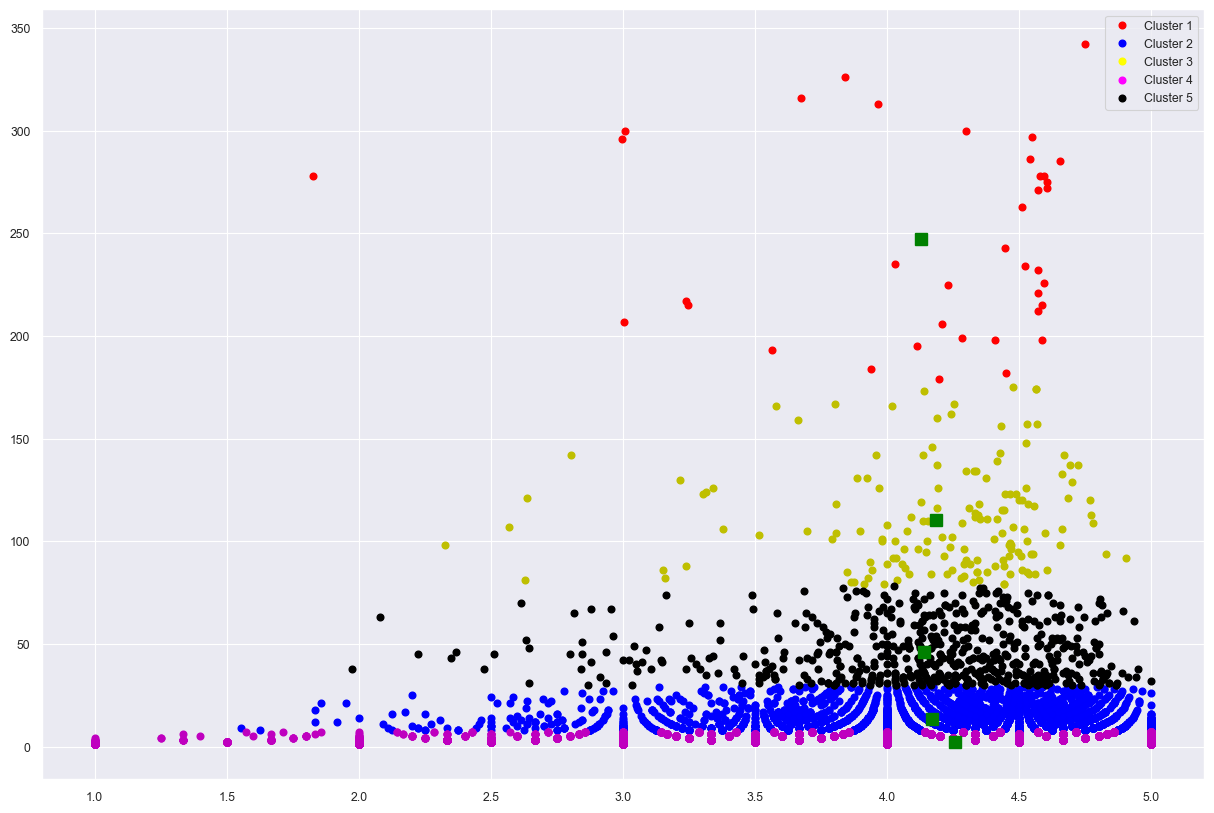

In [108]:
trial = trial[trial['Number of Reviews'] <= 350]
trial_data = np.asarray([np.asarray(trial['Average Score']), np.asarray(trial['Number of Reviews'])]).T
index, centroid = train_clusters(trial_data)
plot_clusters(trial_data, index, centroid)

IndexError: boolean index did not match indexed array along dimension 0; dimension is 26483 but corresponding boolean dimension is 26492

<Figure size 1500x1000 with 0 Axes>